In [11]:

import numpy as np
import matplotlib.pyplot as plt
from utils import func1, func2, func3, func4, func5, func6, func7, \
                func12_, func3_, func4_, func3__, \
                monomial_poly, monomial_trig, monomial_poly_name, monomial_trig_name
from GSINDy import *


In [12]:
deriv_spline = True#False#
threshold_tol = 1e-3

In [13]:
#%% compare to pysindy
import pysindy as ps

if func.__name__ not in ['func6', 'func7']:
    from pysindy.feature_library import GeneralizedLibrary, PolynomialLibrary, CustomLibrary
    functions = [lambda x,y: 1, \
            lambda x,y: x, lambda x,y: y, \
            lambda x,y: x**2, lambda x,y: x*y, lambda x,y: y**2, \
            lambda x,y: x**3, lambda x,y: x**2*y, lambda x,y: x*y**2, lambda x,y: y**3, \
            lambda x,y: x**4, lambda x,y: x**3*y, lambda x,y: x**2*y**2, lambda x,y: x*y**3, lambda x,y: y**4, \
            lambda x,y: x**5, lambda x,y: x**4*y, lambda x,y: x**3*y**2, lambda x,y: x**2*y**3, lambda x,y: x*y**4, lambda x,y: y**5]
    names = [lambda x,y: '1', \
            lambda x,y: 'x', lambda x,y: 'y', \
            lambda x,y: 'x^2', lambda x,y: 'xy', lambda x,y: 'y^2', \
            lambda x,y: 'x^3', lambda x,y: 'x^2y', lambda x,y: 'xy^2', lambda x,y: 'y^3', \
            lambda x,y: 'x^4', lambda x,y: 'x^3y', lambda x,y: 'x^2y^2', lambda x,y: 'xy^3', lambda x,y: 'y^4', \
            lambda x,y: 'x^5', lambda x,y: 'x^4y', lambda x,y: 'x^3y^2', lambda x,y: 'x^2y^3', lambda x,y: 'xy^4', lambda x,y: 'y^5']
    lib_custom = CustomLibrary(library_functions=functions, function_names=names)
    lib_generalized = GeneralizedLibrary([lib_custom])

    from pysindy.optimizers import STLSQ
    optimizer = STLSQ(threshold=threshold_sindy, alpha=alpha)
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)
        
else:
    from pysindy.feature_library import FourierLibrary, CustomLibrary
    from pysindy.feature_library import GeneralizedLibrary
    functions = [lambda x,y: 1, lambda x,y: x, lambda x,y: y, lambda x,y: np.sin(x), lambda x,y: np.sin(y), \
                  lambda x,y: np.cos(x), lambda x,y: np.cos(y)]
    names = [lambda x,y: '1', lambda x,y: 'x', lambda x,y: 'y', lambda x,y: 'sin(x)', lambda x,y: 'sin(y)', \
              lambda x,y: 'cos(x)', lambda x,y: 'cos(y)']
    lib_custom = CustomLibrary(library_functions=functions, function_names=names)
    lib_generalized = GeneralizedLibrary([lib_custom])
    from pysindy.optimizers import STLSQ
    optimizer = STLSQ(threshold=threshold_sindy, alpha=alpha)
    
    model = ps.SINDy(feature_names=["x", "y"], feature_library=lib_generalized, optimizer=optimizer)

# 3 different variables: Hopf

Text(1, 0.8, "$y'=x + a*y + b*x^2y + c*y^3$")

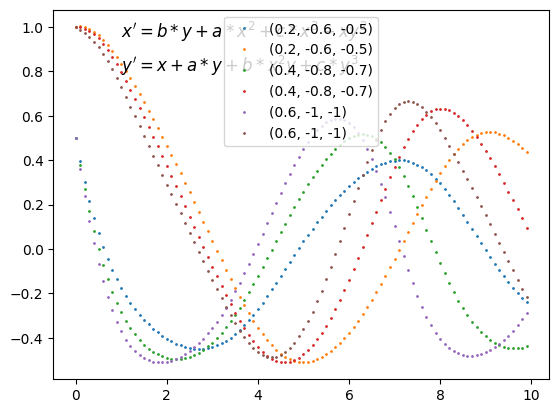

In [20]:
################### 3 variable ####################
alpha = .05
dt = .1      ## 2,3,6,8;     1,2,7,9
t = np.arange(0,10,dt)
x0 = [.5, 1]
a = [(.2, -.6, -.5), (.4, -.8, -.7), (.6, -1, -1)]
func = func3__
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=b*y + a*x^2 + c*x^3 - xy^2"
real1 = "y'=x + a*y + b*x^2y + c*y^3"
threshold_sindy=1e-2
threshold_similarity = 1e-2

#### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

for i in range(num_traj):
    plt.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
plt.legend()
plt.text(1, .95, f'${real0}$', fontsize=12)
plt.text(1, .8, f'${real1}$', fontsize=12)

In [21]:

from utils import ode_solver
for i in range(len(a)):
    # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
    sol_, t_ = ode_solver(func, x0, t, a[i])
    _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)

    model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
    model.print()
    # model.coefficients()
    
    # theta_ = monomial(sol_)
    # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))
    

(x)' = 0.003 x + -0.600 y + 0.206 x^2 + 0.006 xy + -0.533 x^3 + -1.021 xy^2 + -0.034 x^4 + -0.037 x^3y + -0.024 x^2y^2 + -0.021 xy^3 + 0.070 x^5 + 0.096 x^3y^2 + 0.003 x^2y^3 + 0.036 xy^4
(y)' = 0.009 1 + 1.007 x + 0.193 y + -0.078 x^2 + -0.044 y^2 + -0.049 x^3 + -0.540 x^2y + -0.033 xy^2 + -0.466 y^3 + 0.127 x^4 + -0.001 x^3y + 0.119 x^2y^2 + -0.021 xy^3 + 0.032 y^4 + -0.103 x^4y + 0.052 x^3y^2 + -0.103 x^2y^3 + 0.042 xy^4 + -0.023 y^5
(x)' = 0.037 1 + 0.076 x + -0.799 y + 0.220 x^2 + -0.082 xy + -0.134 y^2 + -0.992 x^3 + -0.013 x^2y + -1.200 xy^2 + 0.024 y^3 + 0.178 x^4 + 0.386 x^3y + 0.235 x^2y^2 + 0.181 xy^3 + 0.026 y^4 + -0.055 x^4y + -0.152 x^3y^2 + -0.009 xy^4 + 0.054 y^5
(y)' = 0.016 1 + 1.045 x + 0.397 y + -0.042 x^2 + -0.030 xy + -0.028 y^2 + -0.169 x^3 + -0.824 x^2y + -0.117 xy^2 + -0.694 y^3 + -0.061 x^4 + 0.125 x^3y + -0.166 x^2y^2 + 0.017 xy^3 + -0.101 y^4 + 0.152 x^4y + 0.261 x^2y^3 + 0.062 xy^4 + 0.116 y^5
(x)' = 0.675 1 + 1.619 x + -0.075 y + -2.247 x^2 + -1.174 xy + -

# 2 different variables: fun12_

Text(1, 0.8, "$y'=-y$")

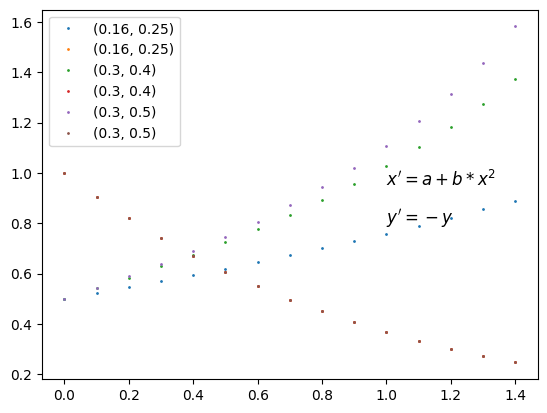

In [22]:
alpha = .05
dt = .1   ## 0,3
t = np.arange(0,1.5,dt)
x0 = [.5, 1]
a = [(.16, .25), (.3, .4), (.3, .5)]
func = func12_
monomial = monomial_poly
monomial_name = monomial_poly_name
real0 = "x'=a + b*x^2"
real1 = "y'=-y"
threshold_sindy=7e-2
threshold_similarity = 1e-3
threshold_tol = 1e-2

### plot
num_traj = len(a)
num_feature = len(x0)

from utils import get_multi_sol
sol_org_list = get_multi_sol(func, x0, t, a)

for i in range(num_traj):
    plt.plot(t, sol_org_list[i], 'o', markersize=1, label=f'{a[i]}')
plt.legend()
plt.text(1, .95, f'${real0}$', fontsize=12)
plt.text(1, .8, f'${real1}$', fontsize=12)

In [23]:
from utils import ode_solver
for i in range(len(a)):
    # sol_, sol_deriv_, t_ = get_sol_deriv(func, x0, t, a[i], deriv_spline)
    sol_, t_ = ode_solver(func, x0, t, a[i])
    _, sol_deriv_, _ = get_deriv(sol_, t, deriv_spline)

    model.fit(sol_, t=t_, x_dot=sol_deriv_, ensemble=True, quiet=True)
    model.print()
    # model.coefficients()
    
    # theta_ = monomial(sol_)
    # print(SLS(theta_, sol_deriv_, threshold_sindy, threshold_tol))

(x)' = -7.154 1 + -116.092 x + 194.548 x^2 + 15.111 xy + -201.309 x^3 + 18.811 x^2y + 97.045 x^4 + 133.332 x^3y + -20.030 x^5 + 121.360 x^4y
(y)' = -8099.042 1 + 816.099 x + -16660.396 y + 28581.099 x^2 + 45792.160 xy + 25053.840 y^2 + -36037.275 x^3 + 6429.204 x^2y + -20022.656 xy^2 + -4792.460 y^3 + 19508.466 x^4 + -36625.343 x^3y + -17222.606 x^2y^2 + -24498.741 xy^3 + -3848.072 y^4 + -3984.426 x^5 + -1972.783 x^3y^2 + 10710.898 x^2y^3 + 16022.865 xy^4 + 400.277 y^5
(x)' = 76143.348 1 + -50108.612 x + -45302.197 y + 46791.197 x^2 + -100179.241 xy + -22921.401 x^3 + -107462.959 x^2y + 70951.302 xy^2 + 2229.682 x^4 + -61530.716 x^3y + -20332.332 x^2y^2 + 334.643 y^4 + -494.166 x^5 + 49707.392 x^4y + 288558.359 x^3y^2
(y)' = -6008.269 1 + 4219.501 x + 2494.209 y + -2035.960 x^2 + 2276.286 xy + 14458.468 y^2 + 2112.960 x^3 + 9069.036 x^2y + -7122.442 xy^2 + 1855.980 y^3 + 197.919 x^4 + -4648.790 x^2y^2 + -17801.195 xy^3 + -1046.270 y^4 + 19.985 x^5 + -8649.169 x^4y + 3936.593 x^3y^2 + -

**************************************************
real0: x'=a + b*x^2
feature 0 with different basis ['1' 'x^2']: 
 [[0.160 0.250]
 [0.300 0.400]
 [0.300 0.499]] 
 ['1' 'x^2']
real1: y'=-y
feature 1 with different basis []: 
 [[-1.000]
 [-1.000]
 [-1.000]] 
 ['y']


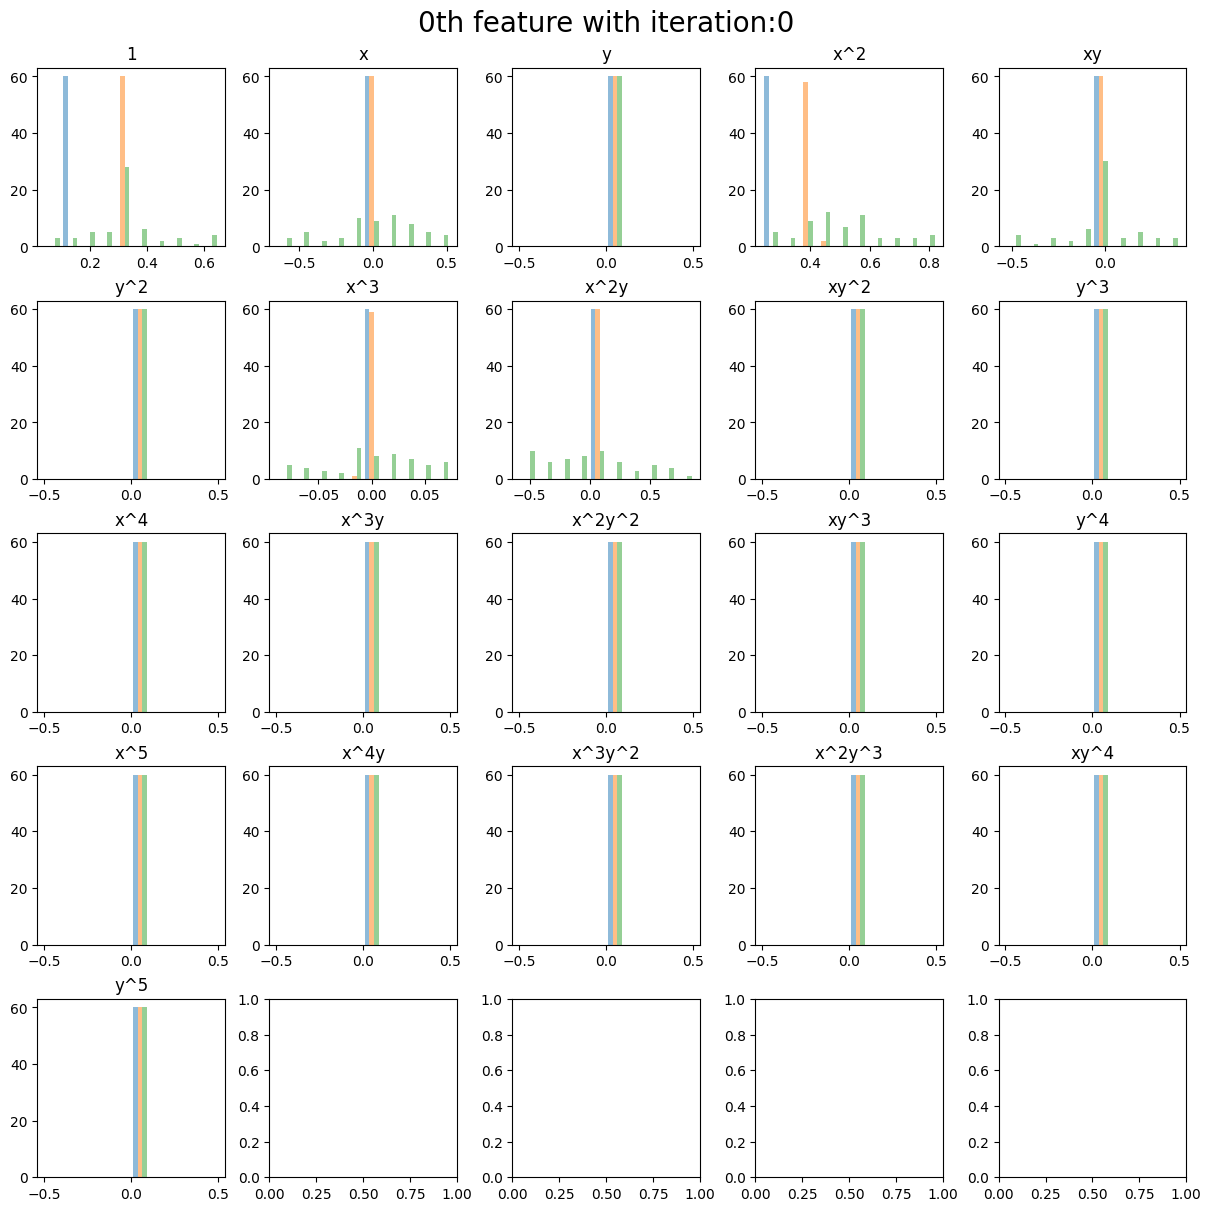

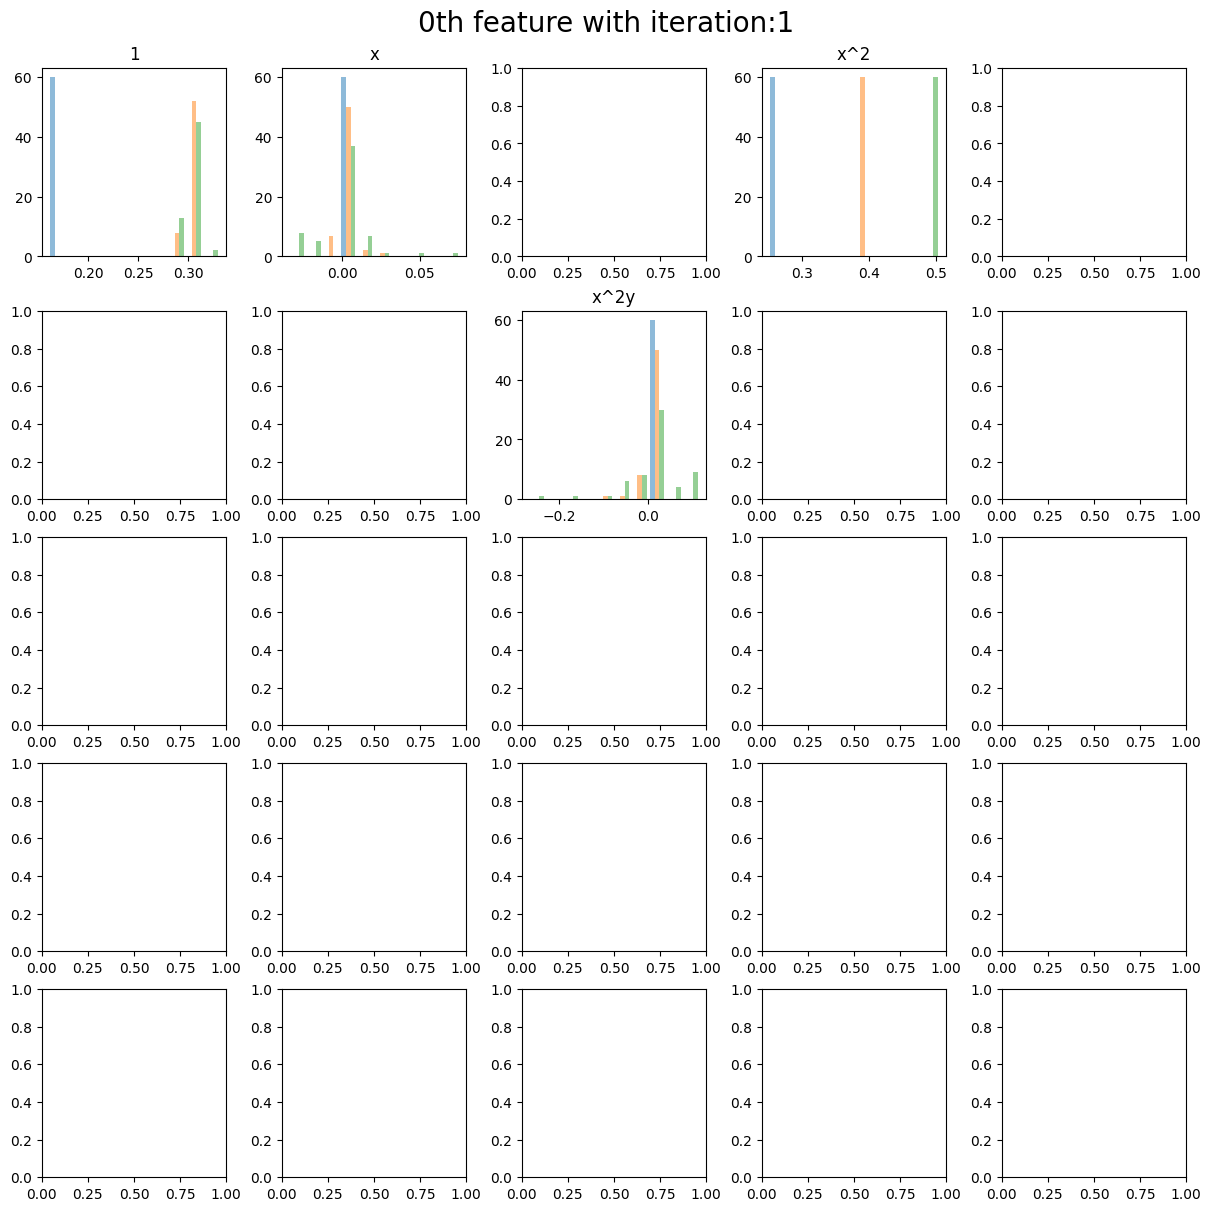

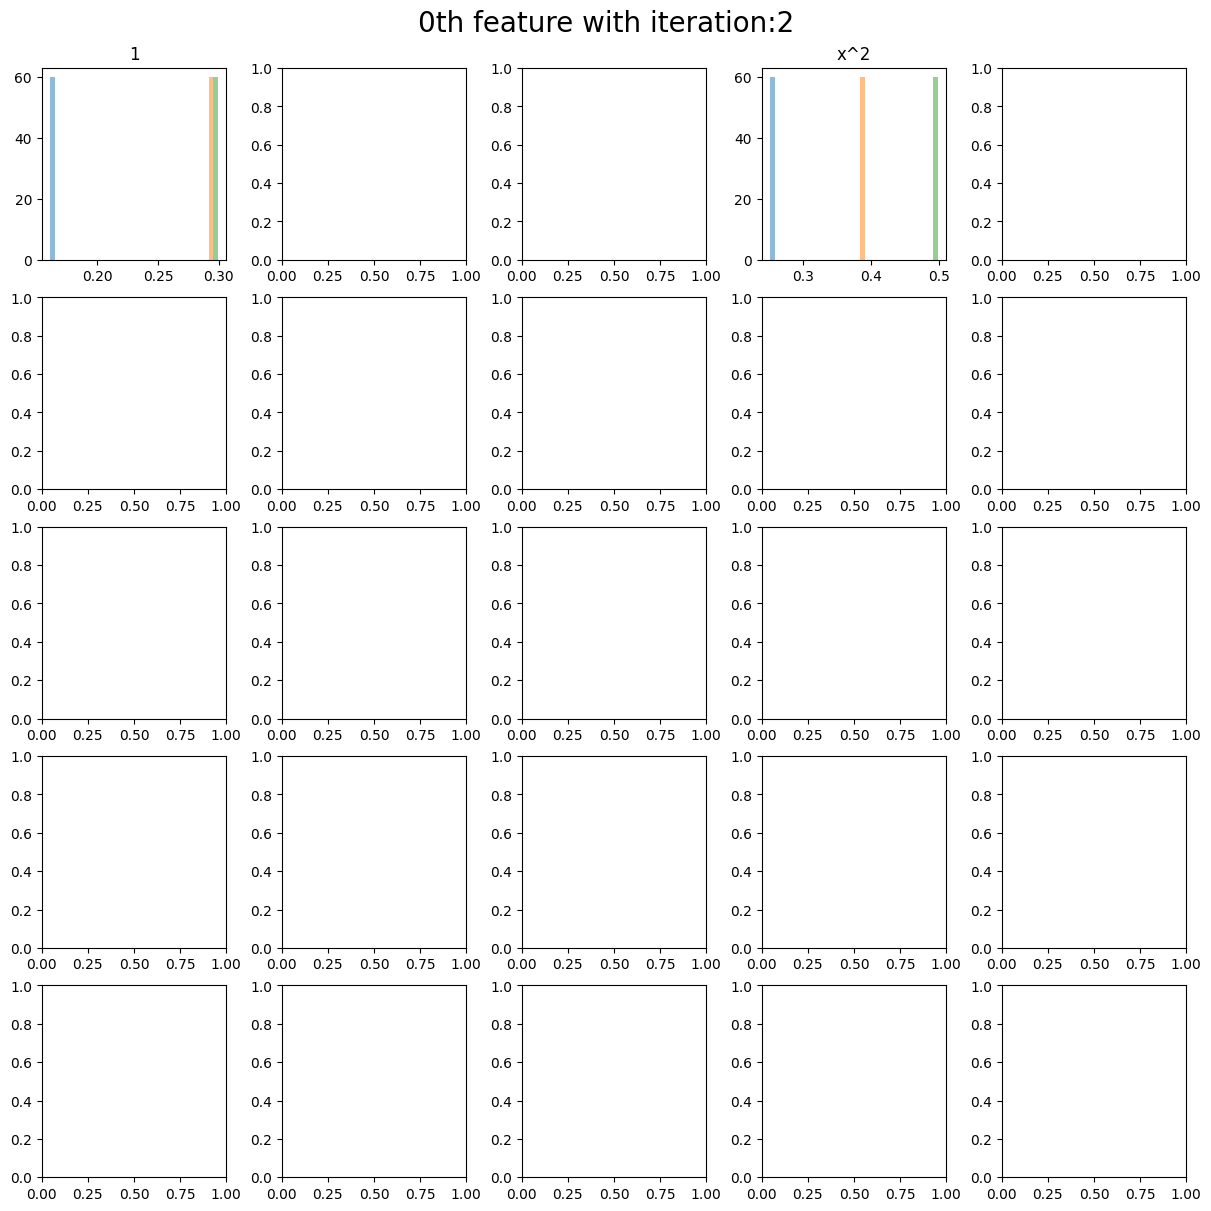

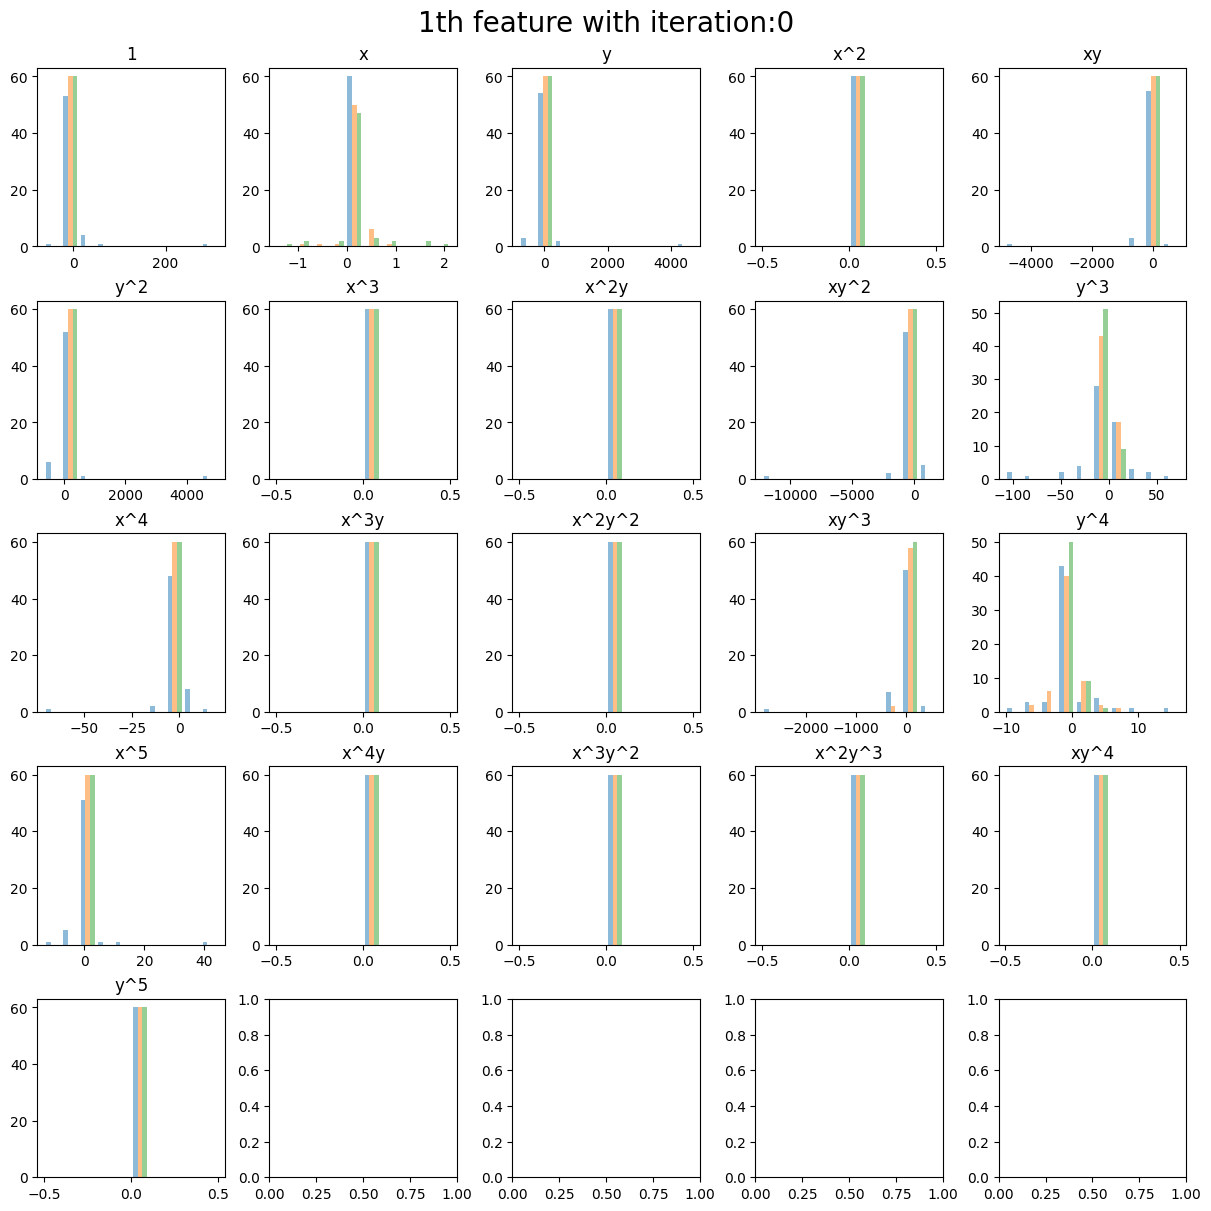

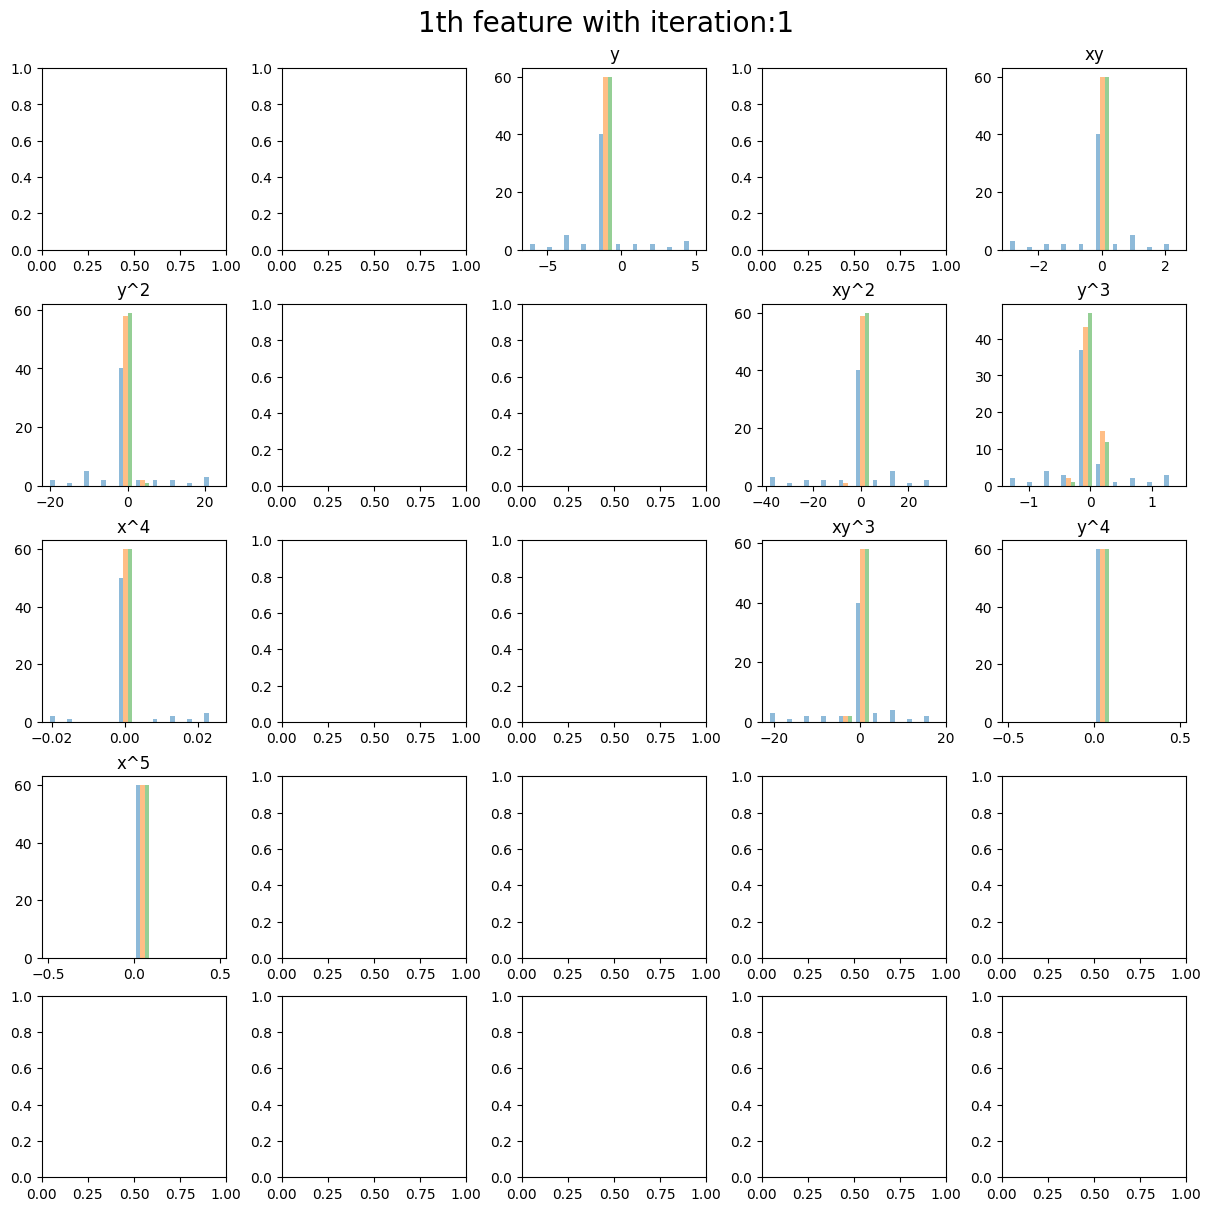

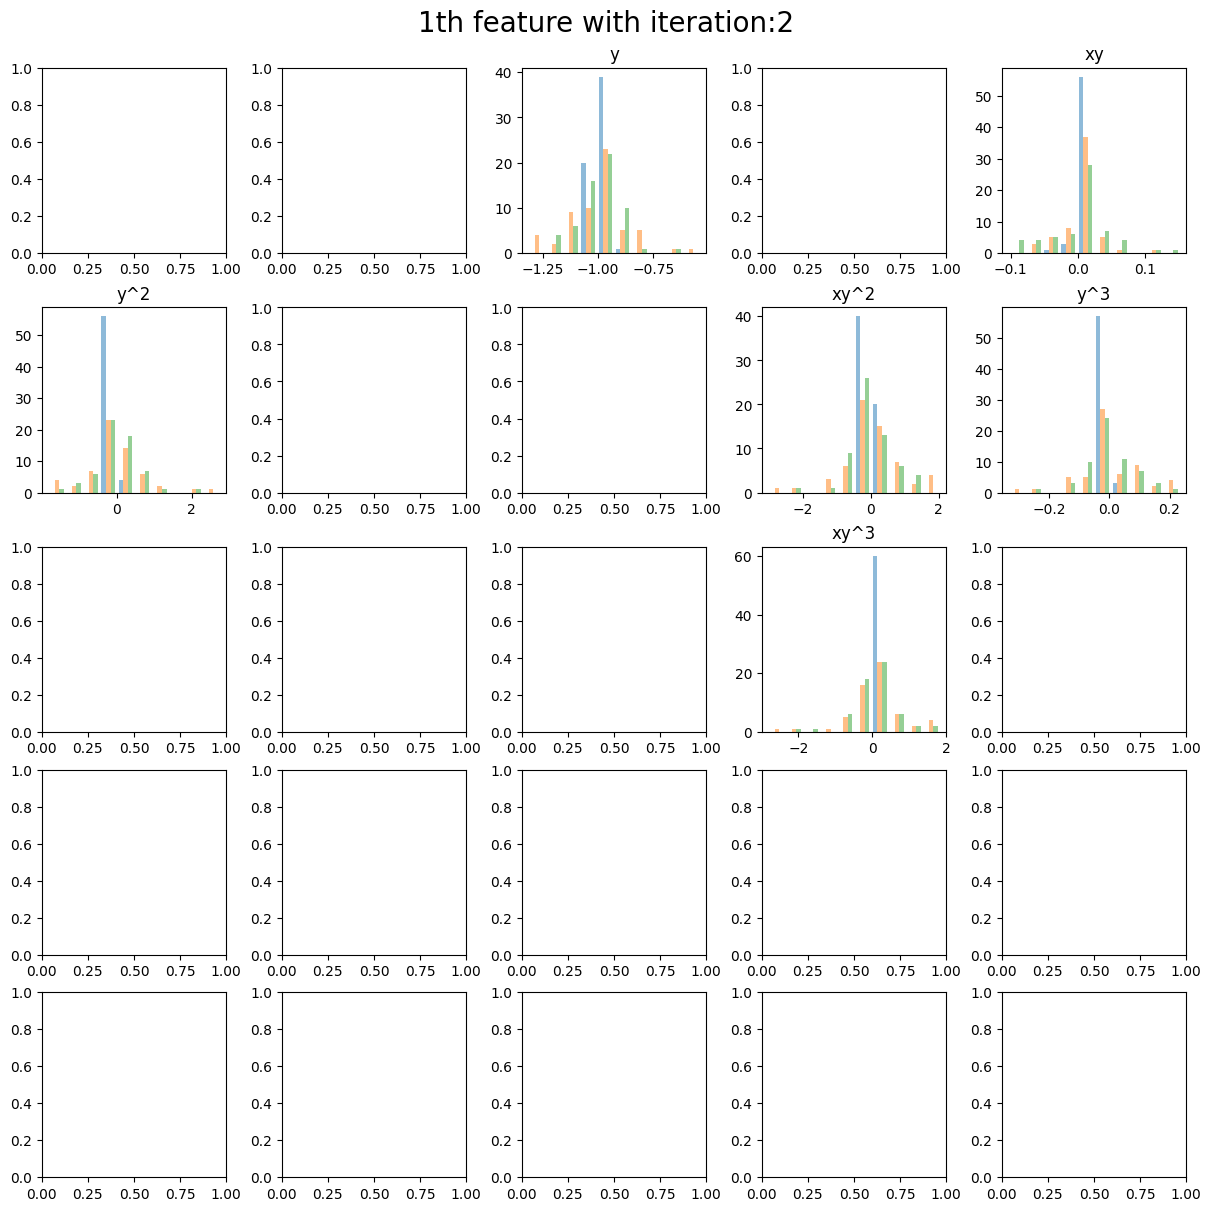

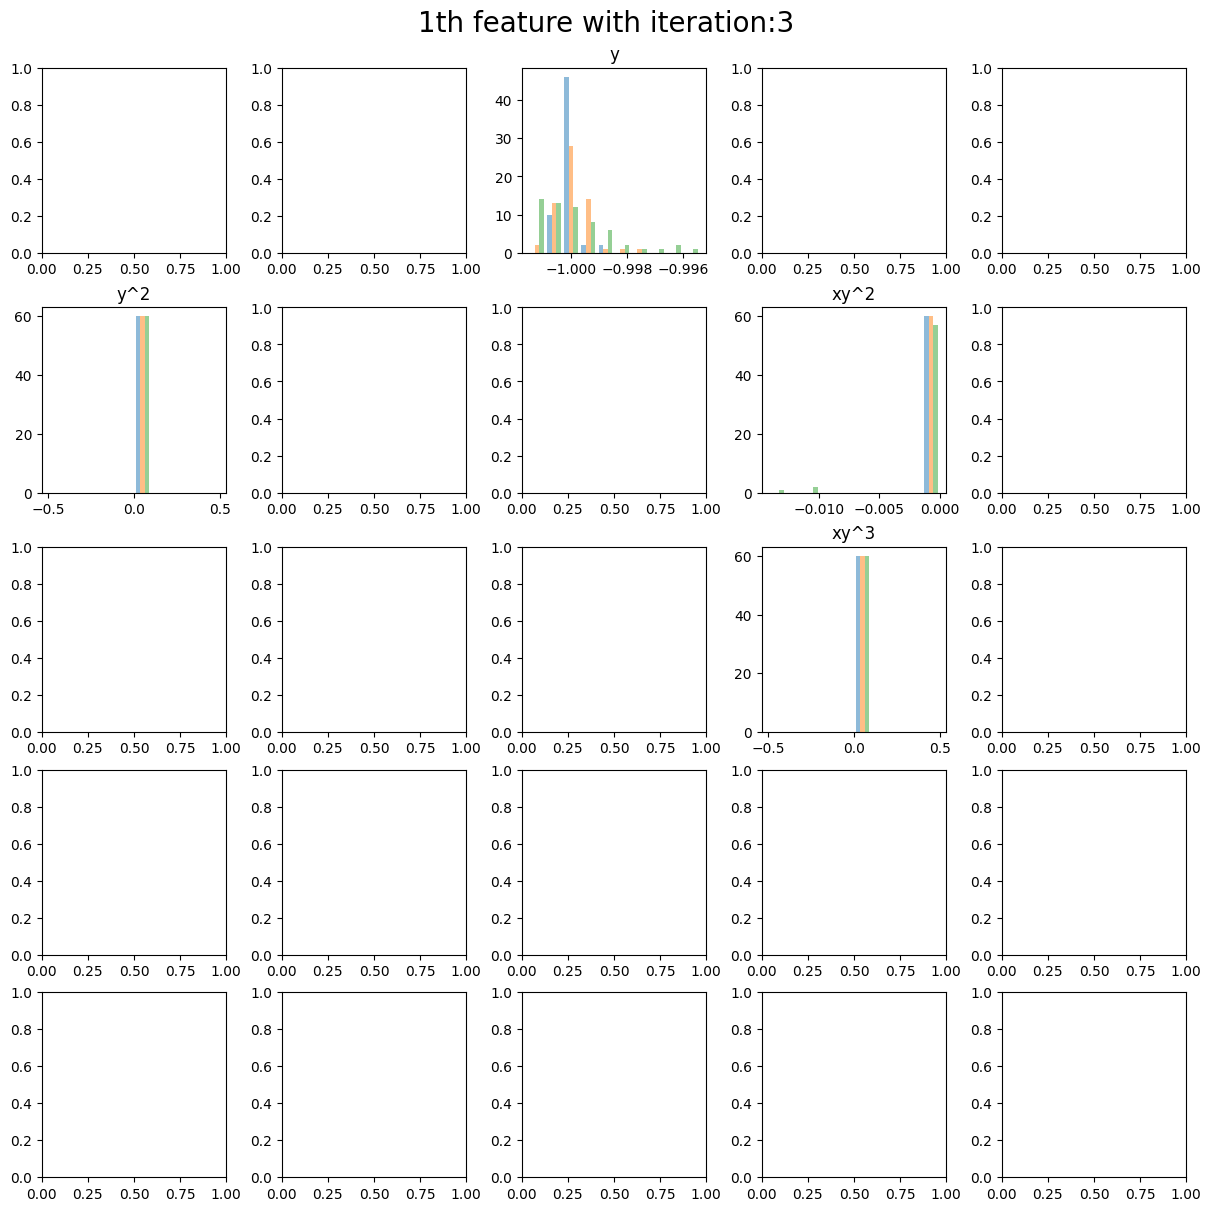

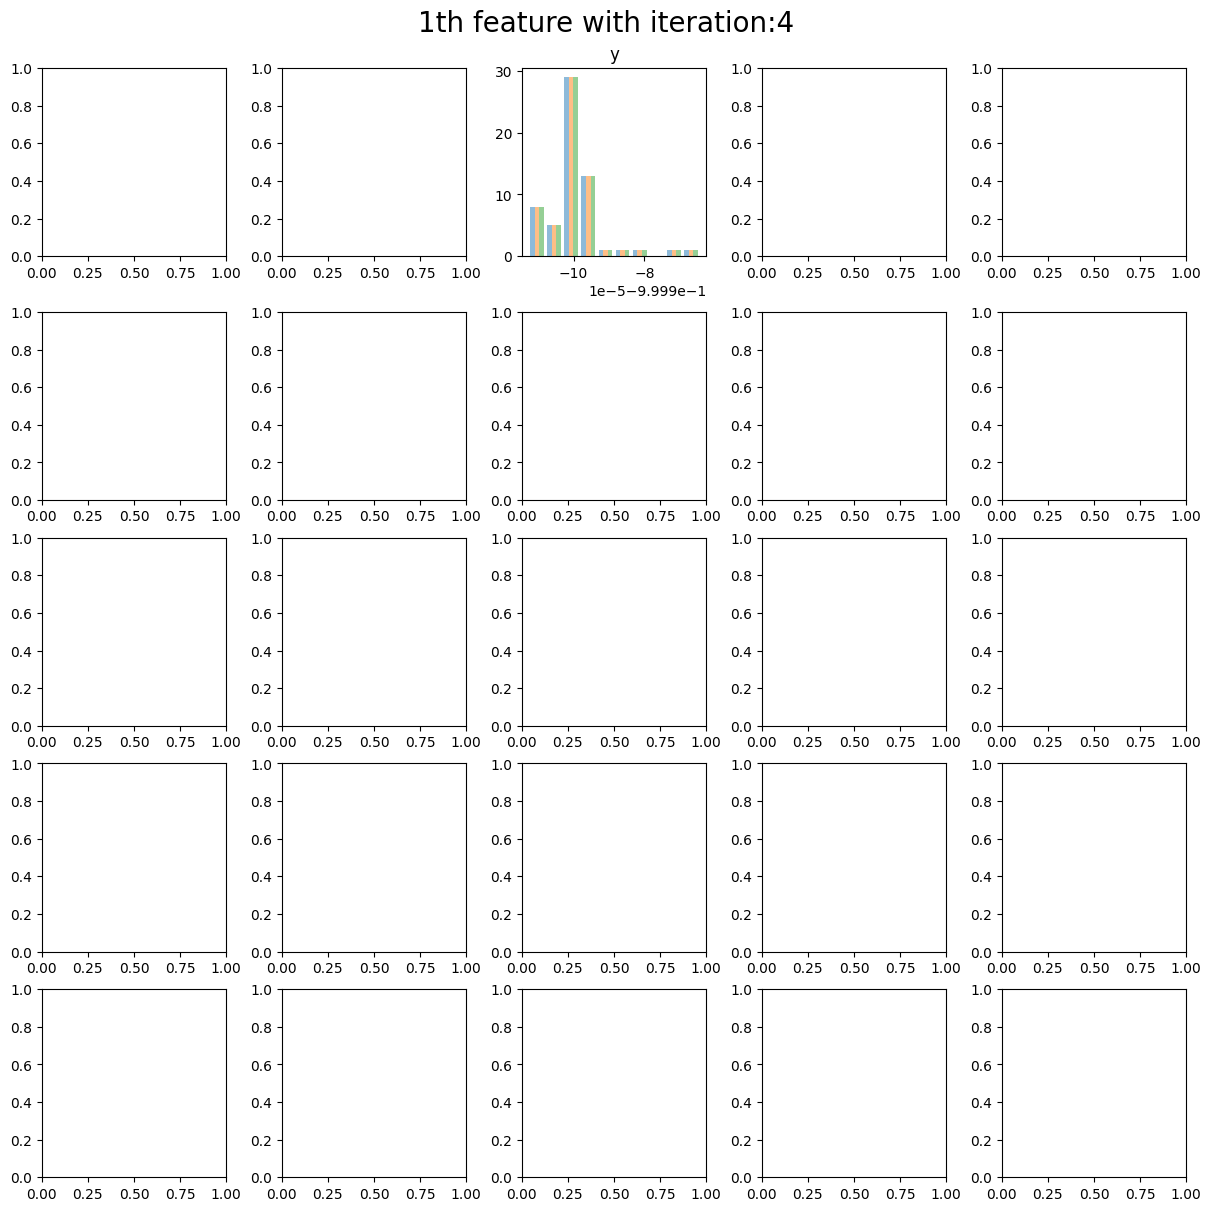

In [24]:
gsindy = GSINDy(monomial=monomial,\
                monomial_name=monomial_name, \
                num_traj = num_traj, \
                num_feature = num_feature, \
                threshold_sindy=threshold_sindy, \
                threshold_tol=threshold_tol, \
                threshold_similarity=threshold_similarity, \
                alpha=alpha,\
                deriv_spline=deriv_spline)
    
gsindy.get_multi_sub_series(sol_org_list, t, num_series=60, window_per=.7) ### to get theta_list, sol_deriv_list
gsindy.basis_identification(remove_per=.2)

Xi_final = gsindy.prediction(sol_org_list, t)


all_basis = gsindy.all_basis
diff_basis = gsindy.diff_basis
np.set_printoptions(formatter={'float': lambda x: "{0:.3f}".format(x)})
print('*'*50)
print(f'real0: {real0}')
print(f'feature 0 with different basis {monomial_name[diff_basis[0]]}: \n {Xi_final[:,0,all_basis[0]]} \n {monomial_name[all_basis[0]]}')
print(f'real1: {real1}')
print(f'feature 1 with different basis {monomial_name[diff_basis[1]]}: \n {Xi_final[:,1,all_basis[1]]} \n {monomial_name[all_basis[1]]}')